This notebook plots the outputs from the random forests. 

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
def get_factors(x, y):
    # Label Factorization- For Plot Vis
    labels_factorization = {
    'rootstock_year' : ['Ungrafted: 2017', '1103P: 2017', '3309C: 2017', 'SO4: 2017', 'Ungrafted: 2018', '1103P: 2018', '3309C: 2018', 'SO4: 2018', 'Ungrafted: 2019', '1103P: 2019', '3309C: 2019', 'SO4: 2019'],
    'rootstock_phenology' : ['Ungrafted: Anthesis', '1103P: Anthesis', '3309C: Anthesis', 'SO4: Anthesis', 'Ungrafted: Veraison', '1103P: Veraison', '3309C: Veraison', 'SO4: Veraison', 'Ungrafted: Harvest', '1103P: Harvest', '3309C: Harvest', 'SO4: Harvest'],
    'rootstock_leafpos' : ['Ungrafted: X', '1103P: X', '3309C: X', 'SO4: X', 'Ungrafted: Y', '1103P: Y', '3309C: Y', 'SO4: Y', 'Ungrafted: Z', '1103P: Z', '3309C: Z', 'SO4: Z'],
    'rootstock_None' : ['Ungrafted', '1103P', '3309C', 'SO4'],
    'phenology_leafpos' : ['Anthesis: X', 'Anthesis: Y', 'Anthesis: Z', 'Veraison: X', 'Veraison: Y', 'Veraison: Z', 'Harvest: X', 'Harvest: X', 'Harvest: X'],
    'year_leafpos' : ['2017: X', '2017: Y', '2017: Z', '2018: X', '2018: Y', '2018: Z', '2019: X', '2019: Y', '2019: Z'],
    'year_phenology' : ['2017_Anthesis', '2017_Veraison', '2017_Harvest', '2018_Anthesis', '2018_Veraison', '2018_Harvest', '2019_Anthesis', '2019_Veraison', '2019_Harvest'],
    'year_None' : ['2017', '2018', '2019'],
    'phenology_None' : ['Anthesis', 'Veraison', 'Harvest'],
    'leafpos_None' : ['X', 'Y', 'Z'],
    'treatment_None' : ['None', 'RDI', 'Full'],
    'block_None' : ['1', '2', '3', '4', '5', '6'],
    'rupestris_None' : [0,1],
    'berlandieri_None' : [0,1],
    'riparia_None' : [0,1],
    'grafted_None' : [0,1]
    }
    factors = labels_factorization[f'{x}_{y}']
    return factors

current path:  /xfs2/millerlab/julia.pratt/Ionomics/random_forest_notebook/scripts
year_phenology_bt_k10_confusion_matrix_stats.csv


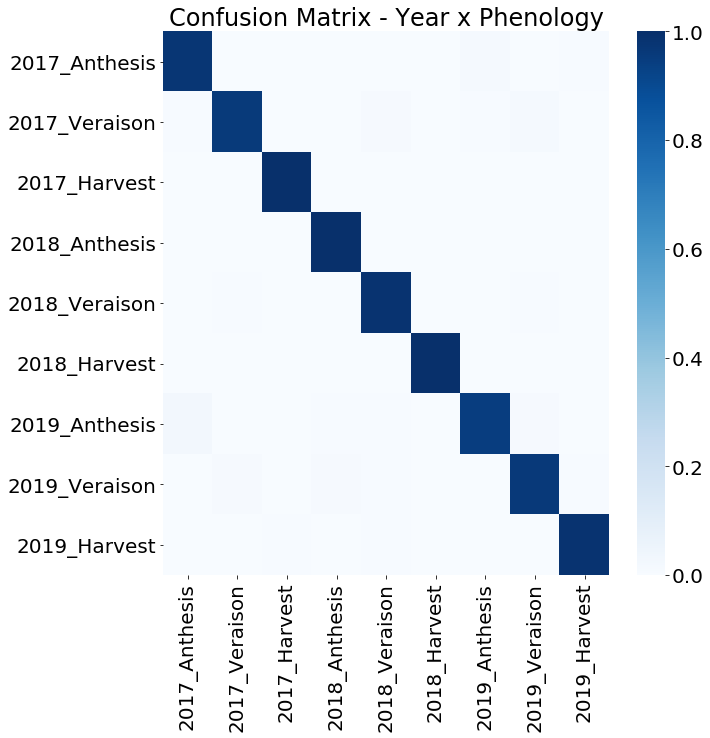

In [3]:
# Largest do not include percents, smaller do include percents
import glob, os

path = os.getcwd()
print('current path: ', path)
for file in glob.glob("*confusion_matrix_stats.csv"):
    print(file)
    
    split_file = file.split('_')
    x = split_file[0]
    y = split_file[1]
    if y == 'None':
        plot_title = x.title()
    else:
        plot_title = f'{x.title()} x {y.title()}'
    
    cm_stats = pd.read_csv(file)
    cm_stats = cm_stats.drop('Unnamed: 0', axis=1)
    cm_stats.to_numpy()
    cm_stats_normalized = normalize(cm_stats, norm="l1")
    
    factors = get_factors(x, y)
    
    if y != 'None':
        annot = False
    else:
        annot = True
        
    # Confusion Matrix Plot
    matplotlib.rcParams.update({'font.size': 20})
    plt.figure(figsize=(10,10))
    #plt.figure()
    ax = sn.heatmap(cm_stats_normalized,
                   fmt='.1%',
                   annot=annot,
                   cmap='Blues',
                   vmin=0, vmax=1,
                   xticklabels=factors,
                   yticklabels=factors,
                   annot_kws={"fontsize":22})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_title(f'Confusion Matrix - {plot_title}')
    ax.figure.savefig(f'{x}_{y}_bt_k10_confusion_matrix_vis.pdf', bbox_inches='tight')
    

current path:  /xfs2/millerlab/julia.pratt/Ionomics/random_forest_notebook/scripts


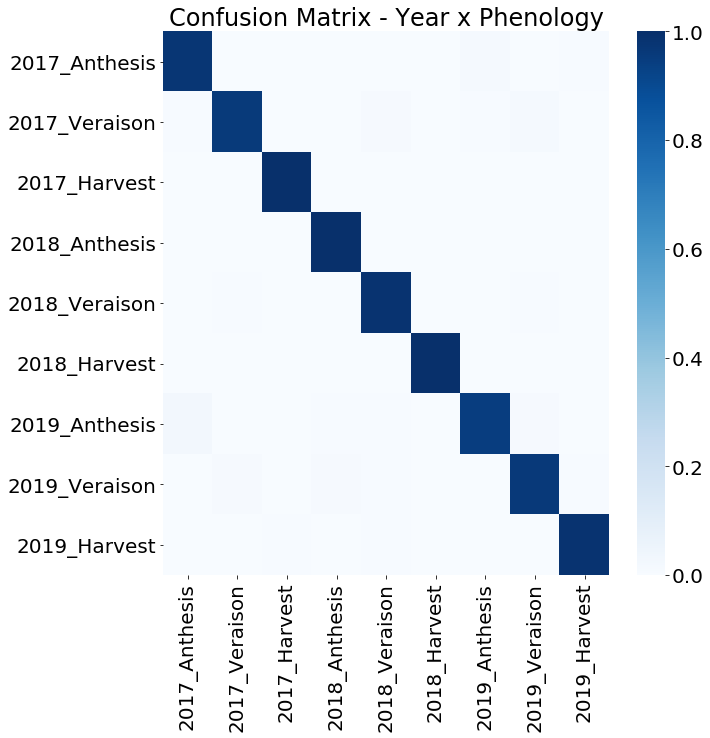

In [4]:
# Do not include percents

path = os.getcwd()
print('current path: ', path)
for file in glob.glob("*confusion_matrix_stats.csv"):
    
    split_file = file.split('_')
    x = split_file[0]
    y = split_file[1]
    if y == 'None':
        plot_title = x.title()
    else:
        plot_title = f'{x.title()} x {y.title()}'
    
    cm_stats = pd.read_csv(file)
    cm_stats = cm_stats.drop('Unnamed: 0', axis=1)
    cm_stats.to_numpy()
    cm_stats_normalized = normalize(cm_stats, norm="l1")
    
    factors = get_factors(x, y)
    
    if y != 'None':
        annot = False
    else:
        annot = True
        
    # Confusion Matrix Plot
    matplotlib.rcParams.update({'font.size': 20})
    plt.figure(figsize=(10,10))
    #plt.figure()
    ax = sn.heatmap(cm_stats_normalized,
                   fmt='.1%',
                   annot=False,
                   cmap='Blues',
                   vmin=0, vmax=1,
                   xticklabels=factors,
                   yticklabels=factors,
                   annot_kws={"fontsize":22})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_title(f'Confusion Matrix - {plot_title}')
    ax.figure.savefig(f'{x}_{y}_bt_k10_no_percents_confusion_matrix_vis.pdf', bbox_inches='tight')    

current path:  /xfs2/millerlab/julia.pratt/Ionomics/random_forest_notebook/scripts
year_phenology_bt_k10_confusion_matrix_stats.csv


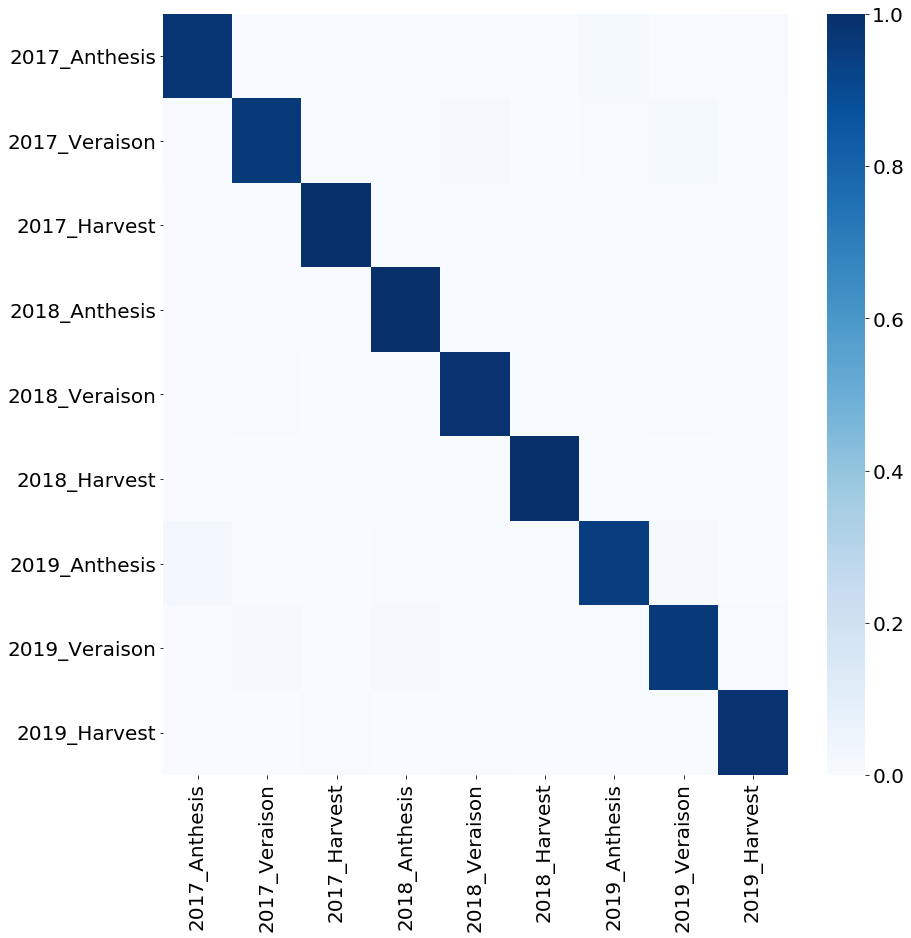

In [5]:
# For a poster
path = os.getcwd()
print('current path: ', path)
for file in glob.glob("*confusion_matrix_stats.csv"):
    print(file)
    
    split_file = file.split('_')
    x = split_file[0]
    y = split_file[1]
    if y == 'None':
        plot_title = x.title()
    else:
        plot_title = f'{x.title()} x {y.title()}'
    
    cm_stats = pd.read_csv(file)
    cm_stats = cm_stats.drop('Unnamed: 0', axis=1)
    cm_stats.to_numpy()
    cm_stats_normalized = normalize(cm_stats, norm="l1")
    
    factors = get_factors(x, y)
    
    if y != 'None':
        annot = False
    else:
        annot = True
        
    # Confusion Matrix Plot
    matplotlib.rcParams.update({'font.size': 20})
    plt.figure(figsize=(14,14))
    #plt.figure()
    ax = sn.heatmap(cm_stats_normalized,
                   fmt='.1%',
                   annot=False,
                   cmap='Blues',
                   vmin=0, vmax=1,
                   xticklabels=factors,
                   yticklabels=factors,
                   annot_kws={"fontsize":22})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    #ax.set_title(f'Confusion Matrix - {plot_title}')
    ax.figure.savefig(f'{x}_{y}_bt_k10_poster_confusion_matrix_vis.pdf', dpi=800, format='pdf')    

In [ ]:
import glob, os

path = os.getcwd()
print('current path: ', path)
for file in glob.glob("*confusion_matrix_stats.csv"):
    print(file)
    
    split_file = file.split('_')
    x = split_file[0]
    y = split_file[1]
    if y == 'None':
        plot_title = x.title()
    else:
        plot_title = f'{x.title()} x {y.title()}'
    
    cm_stats = pd.read_csv(file)
    cm_stats = cm_stats.drop('Unnamed: 0', axis=1)
    cm_stats.to_numpy()
    cm_stats_normalized = normalize(cm_stats, norm="l1")
    
    factors = get_factors(x, y)
    
    if y != 'None':
        annot = False
    else:
        annot = True
        
    # Confusion Matrix Plots
    
    # percents
    matplotlib.rcParams.update({'font.size': 20})
    plt.figure(figsize=(10,10))
    ax = sn.heatmap(cm_stats_normalized,
                   fmt='.1%',
                   annot=annot,
                   cmap='Blues',
                   vmin=0, vmax=1,
                   xticklabels=factors,
                   yticklabels=factors,
                   annot_kws={"fontsize":22})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_title(f'Confusion Matrix - {plot_title}')
    ax.figure.savefig(f'{x}_{y}_bt_k10_confusion_matrix_vis.pdf', bbox_inches='tight')
    
    # no percents
    matplotlib.rcParams.update({'font.size': 20})
    plt.figure(figsize=(10,10))
    ax = sn.heatmap(cm_stats_normalized,
                   fmt='.1%',
                   annot=False,
                   cmap='Blues',
                   vmin=0, vmax=1,
                   xticklabels=factors,
                   yticklabels=factors,
                   annot_kws={"fontsize":22})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_title(f'Confusion Matrix - {plot_title}')
    ax.figure.savefig(f'{x}_{y}_bt_k10_no_percents_confusion_matrix_vis.pdf', bbox_inches='tight')   
    
    # png
    matplotlib.rcParams.update({'font.size': 20})
    plt.figure(figsize=(10,10))
    ax = sn.heatmap(cm_stats_normalized,
                   fmt='.1%',
                   annot=False,
                   cmap='Blues',
                   vmin=0, vmax=1,
                   xticklabels=factors,
                   yticklabels=factors,
                   annot_kws={"fontsize":22})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_title(f'Confusion Matrix - {plot_title}')
    ax.figure.savefig(f'{x}_{y}_bt_k10_poster_confusion_matrix_vis.png', bbox_inches='tight', dpi=1200, format = 'png')
                      
                      

In [ ]:
import glob, os

path = os.getcwd()
print('current path: ', path)
for file in glob.glob("*confusion_matrix_stats.csv"):
    print(file)
    # png
    matplotlib.rcParams.update({'font.size': 20})
    plt.figure(figsize=(10,10))
    ax = sn.heatmap(cm_stats_normalized,
                   fmt='.1%',
                   annot=False,
                   cmap='Blues',
                   vmin=0, vmax=1,
                   xticklabels=factors,
                   yticklabels=factors,
                   annot_kws={"fontsize":22})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_title(f'Confusion Matrix - {plot_title}')
    ax.figure.savefig(f'{x}_{y}_bt_k10_poster_confusion_matrix_vis.png', bbox_inches='tight', dpi=900, format = 'png')